# Implementation - Assignment 5 Diagnostic systems

Karl Lenberg & Kailash de jesus Hornig

Eickhoss summary of signs: 

"The size of cells tends to be homogeneous given a speciﬁc type of tissue. 

1) The presence of signiﬁcantly larger cells is evidence for the uncontrolled growth that is indicative of malignant tumors. 

2) The shape of benign cells usually shows only limited variance, whereas malignant cells can develop arbitrary structures that do not conform with the general pattern of their surroundings. 

3) The color of the cell nucleus should be identical for regular cells of the same type. Cancer cells often have signiﬁcantly larger and darker nuclei that are more densely packed with DNA. 

4) Regular cells show similar texture. Malignant tumors, on the other hand, can range from smooth surfaces to ragged or lumpy textures for neighbouring cells. 

5) Finally, for healthy tissue, cell arrangement tends to be orderly, with regular distances between cells. Cancer cells can spread out or clutter almost arbitrarily.

## Rule based classifier

In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

breast_cancer_df = pd.read_pickle("wdbc.pkl")
breast_cancer_df.head()
#print(df)

X = breast_cancer_df.drop(['malignant', 'id'], axis=1)
Y = breast_cancer_df['malignant']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=420)

In [ ]:
breast_cancer_df.describe()

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Control: no missing values &  Class distribution: 357 benign, 212 malignant
#print("\nNull Values:\n", df.isnull().sum())
#print("\nMissing Values:\n", df.isna().sum())


In [ ]:
def size_control(benign_df, malignant_df, X_data):
    """ Check if size is abnormal --> Area feature (radius, perimeter)
    """
    #print(X_data)
    mean_b = benign_df['area_0'].mean() #assuming that area is bigger as absnomality forecasts
    mean_m = malignant_df['area_0'].mean()
    if (mean_m < mean_b):
        print("ERROR: Assumption doesn't hold")
    threshold =  mean_b + (mean_m-mean_b)/2
    #print(threshold, mean_b, mean_m)
    
    if (X_data['area_0'] > threshold):
        return True
    else: 
        return False

In [ ]:
def shape_control(benign_df, malignant_df, X_data):
    """ Check if shape is abnormal --> concavity, concave points, symmetry, (perimeter), (smothness?)
    """
    #print(X_data)
    mean_b = benign_df['concavity_0'].mean() #assuming that area is bigger as absnomality forecasts
    mean_m = malignant_df['concavity_0'].mean()
    if (mean_m < mean_b):
        print("ERROR: Assumption doesn't hold")
    threshold =  mean_b + (mean_m-mean_b)/2
    #print(threshold, mean_b, mean_m)
    
    if (X_data['concavity_0'] > threshold):
        return True
    else: 
        return False

In [ ]:
def texture_control(benign_df, malignant_df, X_data):
    """ Check if texture is abnormal --> texture feature ie. standard deviation of gray-scale values
    """
    #print(X_data)
    mean_b = benign_df['texture_0'].mean() #assuming that area is bigger as absnomality forecasts
    mean_m = malignant_df['texture_0'].mean()
    if (mean_m < mean_b):
        print("ERROR: Assumption doesn't hold")
    threshold =  mean_b + (mean_m-mean_b)/2
    #print(threshold, mean_b, mean_m)
    
    if (X_data['texture_0'] > threshold):
        return True
    else: 
        return False

In [ ]:
def homogeneity_control(benign_df, malignant_df, X_data):
    """ Check if homogeneity is abnormal --> similar cases: four types from the first article 
    1. circle, ellipse, moon, rough --> best way to tell them apart is with the normalized measure for concave points
    
    No good way to determine if a test instance is of one of the other kind. Same in training data. 
    """
    #print(X_data)
    mean_b = benign_df['concave points_0'].mean() #assuming that area is bigger as absnomality forecasts
    mean_m = malignant_df['concave points_0'].mean()
    if (mean_m < mean_b):
        print("ERROR: Assumption doesn't hold")
    threshold =  mean_b + (mean_m-mean_b)/2
    #print(threshold, mean_b, mean_m)
    
    if (X_data['concave points_0'] > threshold):
        return True
    else: 
        return False

In [ ]:
def predict(Y_guesses, Y_test):
    count =0
    if len(Y_guesses) != len(Y_test):
        print("Error: not compatible sizes")

    else: 
        accuracy=0
        for i in range(Y_test.shape[0]): # loop all rows
            if (Y_guesses[i] == Y_test.iloc[i]):
                #print('Correct prediction')
                count +=1                 
        accuracy = count / len(Y_test)
    return accuracy 

In [ ]:
def rule_based_clf(X_tr, Y_tr, X_te): 
    """
    Will check for abnormalities and if any one of these activate then malignant, 
    else benign
    
    Experiment: get the highest acc with each of the abnomalities along, then combine
    The variation lies in mean, std and worst for the freatures categories in each abnormality category
    """    
    # separate Bedning/Malignant 
    b_df = breast_cancer_df[breast_cancer_df.malignant == 0]
    m_df = breast_cancer_df[breast_cancer_df.malignant == 1]
    
    #predictive part
    Y_pred =[] # list corresponding to the predictions for X_test

    for candidate in range(X_te.shape[0]): # for every test_instance/row  (171)
        #print(candidate)
        
        #give method beging/malignnan data + test instance
        size_guess =  size_control(b_df,m_df, X_te.iloc[candidate]) #0.9122807017543859         
        shape_guess =  False# shape_control(b_df,m_df, X_te.iloc[candidate]) #0.9005847953216374
        texture_guess =  False# texture_control(b_df,m_df, X_te.iloc[candidate]) #0.9005847953216374
        homogeneity_guess = homogeneity_control(b_df,m_df, X_te.iloc[candidate]) #0.9239766081871345
        
        #combine all = 0.7894736842105263 
        #combine size + homo = 0.9473684210526315
        #combine size + shape = 0.9473684210526315

        if (size_guess or shape_guess or texture_guess or homogeneity_guess):
            #print("Predict positive")
            Y_pred.append(1)

        else:
            #print("Predict negative")
            Y_pred.append(0) 

    return Y_pred


In [ ]:
predicted_values_list = rule_based_clf(X_tr=X_train, Y_tr=Y_train, X_te=X_test)
acc = predict(predicted_values_list, Y_test)
print("Accuracy of: " + str(acc))

Accuracy of: 0.9473684210526315


In [ ]:
#confusion matrix and other useful meatures (add ROC?)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
print(classification_report(Y_test, predicted_values_list, target_names = ["Benign", "Malignant"]))
print("Number of Malignant (positive) in testdata: " + str(Y_test.value_counts()[1]))
print("Number of Benign (negative) in testdata: " + str(len(Y_test)-Y_test.value_counts()[1]))
print('Regular:' )
print(confusion_matrix(Y_test, predicted_values_list))
print('Nomarlized:' )
print(confusion_matrix(Y_test, predicted_values_list, normalize='true'))

# recall = sensitivity, hit rate, or true positive rate (TPR)
    #ie. fraction of all acutal positives found 
# specificity, selectivity or true negative rate (TNR)
    #ie. fraction of all acutal negatives found 
# precision = positive predictive value (PPV)
    #ie. fraction of predicted positive that are actual/true positive

              precision    recall  f1-score   support

      Benign       0.96      0.95      0.96       102
   Malignant       0.93      0.94      0.94        69

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Number of Malignant (positive) in testdata: 69
Number of Benign (negative) in testdata: 102
Regular:
[[97  5]
 [ 4 65]]
Nomarlized:
[[0.95098039 0.04901961]
 [0.05797101 0.94202899]]


## Random forest classifier

In [ ]:
# Better feature selection still possible... But is it allowed=? 

1
0.9623717948717948
2
0.9624358974358973


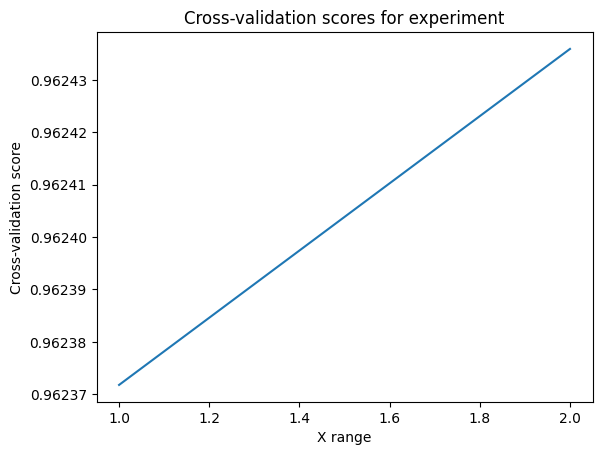

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def cross_RF_estimators(hyperparameter_list):
    result_list = []
    """Best measured result: gini =96.4%, entropy= 96.9%, log_loss does not work... 
       max_depth in range(5, 1000, int((1000-5)/10)) --> 100 or 700
       n_estimators in range(20, 1000, int((1000-20)/10)) --> 200 or 500-800
   """  
    
    for h in hyperparameter_list:
        rf = RandomForestClassifier(criterion='entropy', n_estimators = 200, max_depth=100)
        scores = cross_val_score(rf, X_train, Y_train, cv=10, n_jobs = -1)
        result_list.append(np.mean(scores))
        print(h)
        print(np.mean(scores))

    plt.plot(hyperparameter_list, result_list)
    plt.title("Cross-validation scores for experiment")
    plt.ylabel("Cross-validation score")
    plt.xlabel("X range")
    #plt.savefig("cross_val_randomforest.png")
    plt.show()

#Ranges: 
x= range(20, 1000, int((1000-20)/10))
#cross_RF_estimators(x)
cross_RF_estimators([1,2]) #for categorical values or single runs 

# Best measure results for criterion='entropy', n_estimators = 200, max_depth=100  
# = 0.9723717948717949

In [ ]:
rf = RandomForestClassifier(criterion='entropy', n_estimators = 200, max_depth=100)
rf.fit(X_train, Y_train)
d = {}
d = dict(zip(rf.feature_names_in_, rf.feature_importances_))
print(d)


{'radius_0': 0.029569689989364673, 'texture_0': 0.018098588836138046, 'perimeter_0': 0.06449655804204286, 'area_0': 0.052411305525741574, 'smoothness_0': 0.005920385855505463, 'compactness_0': 0.013464739928464003, 'concavity_0': 0.04745162023329226, 'concave points_0': 0.0860659036927528, 'symmetry_0': 0.005511741015898938, 'fractal dimension_0': 0.00438214320080903, 'radius_1': 0.01829591399115314, 'texture_1': 0.004723345697611209, 'perimeter_1': 0.02397577607681503, 'area_1': 0.038904120778023646, 'smoothness_1': 0.0031788051681741272, 'compactness_1': 0.0050728010066024235, 'concavity_1': 0.0053229314326878555, 'concave points_1': 0.005701336452506783, 'symmetry_1': 0.004684766121323309, 'fractal dimension_1': 0.003786104666008218, 'radius_2': 0.10242542884450244, 'texture_2': 0.025507431172352345, 'perimeter_2': 0.1173469856249796, 'area_2': 0.11724022697011435, 'smoothness_2': 0.01105322744388664, 'compactness_2': 0.01636873233527211, 'concavity_2': 0.036988464977250134, 'concav

In [ ]:
#Random forest bench marks: confusion matrix and other useful meatures
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
rf = RandomForestClassifier(criterion='entropy', n_estimators = 200, max_depth=100)
rf.fit(X_train, Y_train)
rf_y_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_y_pred, target_names = ["Benign", "Malignant"]))
print('Regular:' )
print(confusion_matrix(Y_test, predicted_values_list))
print('Nomarlized:' )
print(confusion_matrix(Y_test, predicted_values_list, normalize='true'))

# Basically the same as before

              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97       102
   Malignant       0.97      0.94      0.96        69

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Regular:
[[97  5]
 [ 4 65]]
Nomarlized:
[[0.95098039 0.04901961]
 [0.05797101 0.94202899]]


## Our own design

### Extract feature importance from random forest

In [ ]:
#Extract feature importance from RFC implementation in previous task
importances = rf.feature_importances_

#Get feature names from training set
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
sum = 0
print("Feature ranking:")
for f in range(X_train.shape[1]):
    sum = sum + importances[indices[f]]
    print("%d. %s (%f) %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]], "Sum:",sum))

Feature ranking:
1. perimeter_2 (0.133998) Sum: (0.133998)
2. radius_2 (0.119741) Sum: (0.253739)
3. area_2 (0.117296) Sum: (0.371035)
4. concave points_2 (0.111923) Sum: (0.482958)
5. concave points_0 (0.066896) Sum: (0.549853)
6. area_0 (0.048480) Sum: (0.598334)
7. concavity_2 (0.044216) Sum: (0.642550)
8. area_1 (0.041598) Sum: (0.684148)
9. radius_0 (0.039301) Sum: (0.723449)
10. perimeter_0 (0.038655) Sum: (0.762104)
11. radius_1 (0.027656) Sum: (0.789760)
12. texture_2 (0.025386) Sum: (0.815146)
13. concavity_0 (0.023905) Sum: (0.839051)
14. texture_0 (0.021547) Sum: (0.860598)
15. compactness_2 (0.017552) Sum: (0.878151)
16. perimeter_1 (0.016731) Sum: (0.894882)
17. compactness_0 (0.015410) Sum: (0.910292)
18. symmetry_2 (0.014506) Sum: (0.924799)
19. smoothness_2 (0.013483) Sum: (0.938281)
20. fractal dimension_2 (0.010527) Sum: (0.948808)
21. smoothness_0 (0.008538) Sum: (0.957346)
22. concave points_1 (0.008206) Sum: (0.965552)
23. texture_1 (0.005730) Sum: (0.971282)
24. s

In [ ]:
#Notice that the first 15 account for approx 90% of the importance

important_features = [feature_names[indices[i]] for i in range(15)]


### Check for correlation between variables

By checking for correlation between variables, one can (potentially) identify features that overlap a lot. If so, one or more features can be excluded. 

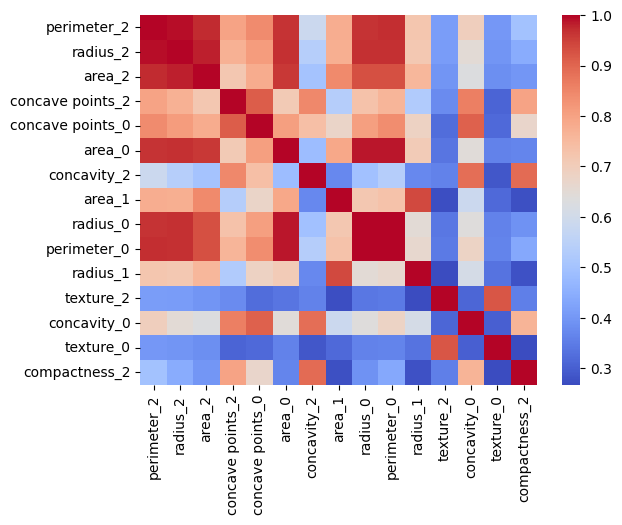

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train[important_features].corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
remaining_features = important_features
for feature in important_features:
    corr_values = X_train[important_features].corr()[feature]
    if feature in remaining_features:
        remaining_features = [feat for feat in remaining_features if abs(corr_values[feat])==1 or abs(corr_values[feat]) < 0.9]

print(remaining_features)

X_train_selected = X_train[remaining_features]
X_test_selected = X_test[remaining_features]

['perimeter_2', 'concave points_2', 'concavity_2', 'area_1', 'texture_2', 'concavity_0', 'compactness_2']


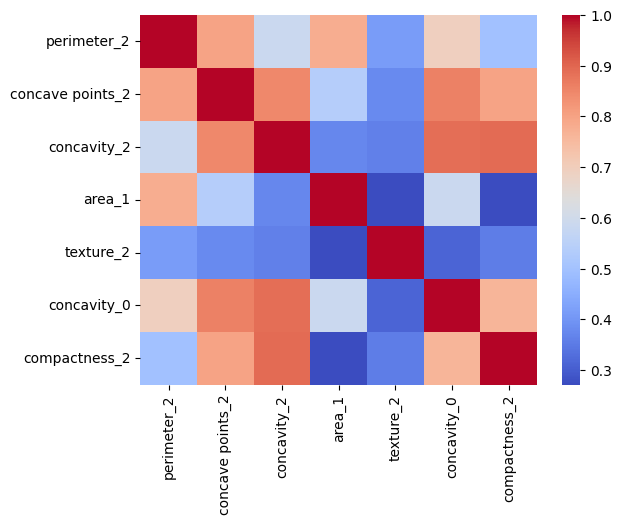

In [ ]:
corr_matrix_remaining = X_train_selected.corr()
sns.heatmap(corr_matrix_remaining, cmap='coolwarm') #Still fairly high correlation between concavity 0,concavity 2 and compactness 2
plt.show()

### Run PCA to check for patterns in the dataset

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Initialize a PCA object with the desired number of components
n_components = 5 #Desired number of features
pca = PCA(n_components=n_components)

# Fit the PCA object to the standardized data
pca.fit(X_train_scaled)

# Get the principal components and their variance explained
explained_variance = pca.explained_variance_ratio_

# Print the variance explained by each component
print("Variance explained by each component:")
for i in range(n_components):
    print("Component {}: {:.2f}%".format(i+1, 100*explained_variance[i]))

Variance explained by each component:
Component 1: 66.31%
Component 2: 14.62%
Component 3: 11.55%
Component 4: 3.40%
Component 5: 2.26%


The first 3 components are responsible for >90% of the variance

In [ ]:
#Check loading of the features in each component
n_components = 3 # change this to the desired number of components
n_features = len(remaining_features) # of top features to print

# Loop over the first n principal components
for i in range(n_components):
    # Get the feature loadings for the current component
    loadings = pd.DataFrame({'Feature': X_train_selected.columns, 'Loading': pca.components_[i]}).sort_values('Loading', ascending=False)
    
    # Sort the loadings in descending order and print the top z features
    print("\nTop {} features for Component {}:".format(n_features, i+1))
    for j in range(n_features):
        print("{}: {:.3f}".format(loadings.iloc[j]['Feature'], loadings.iloc[j]['Loading']))
    #print('\n')



Top 7 features for Component 1:
concave points_2: 0.438
concavity_0: 0.430
concavity_2: 0.418
perimeter_2: 0.390
compactness_2: 0.387
area_1: 0.306
texture_2: 0.229

Top 7 features for Component 2:
area_1: 0.662
perimeter_2: 0.428
texture_2: 0.152
concave points_2: -0.076
concavity_0: -0.099
concavity_2: -0.361
compactness_2: -0.457

Top 7 features for Component 3:
texture_2: 0.950
compactness_2: 0.031
concavity_2: -0.041
perimeter_2: -0.064
concave points_2: -0.087
concavity_0: -0.192
area_1: -0.217


In [ ]:
final_features = ['concave points_2', 'concavity_0', 'area_1', 'perimeter_2', 'texture_2']

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

### Logistic regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

def optimize_logistic_regression(X_train, y_train, X_test, y_test, scale = True):

    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 250, 500],
        'max_iter': [500, 1000, 2000],
        'tol': [1e-5, 1e-4, 1e-3, 1e-2]
    }
    
    # Create a logistic regression classifier
    lr = LogisticRegression(penalty='l2',solver = 'liblinear')
    
    # Perform a grid search with cross-validation to find the optimal hyperparameters
    grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters found
    print("Best hyperparameters found for scaling: "+str(scale) +', is: ', grid_search.best_params_)
    
    # Evaluate the performance of the optimized classifier on the test set
    lr = LogisticRegression(penalty='l2', **grid_search.best_params_)
    lr.fit(X_train, y_train)
    print("Test set accuracy:", lr.score(X_test, y_test))

optimize_logistic_regression(X_train_final, Y_train, X_test_final, Y_test, scale=False)

optimize_logistic_regression(X_train_final, Y_train, X_test_final, Y_test)

Best hyperparameters found for scaling: False, is:  {'C': 250, 'max_iter': 500, 'tol': 1e-05}
Test set accuracy: 0.9415204678362573
Best hyperparameters found for scaling: True, is:  {'C': 1, 'max_iter': 500, 'tol': 1e-05}
Test set accuracy: 0.9532163742690059


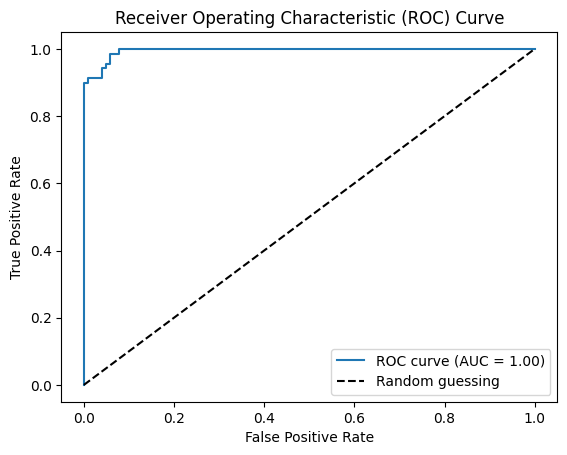

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


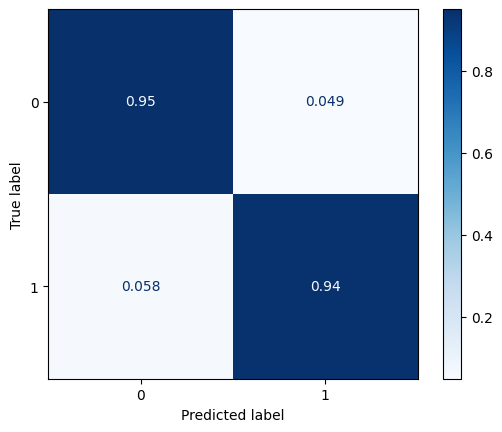

In [ ]:
#Run tests on optimal model

from sklearn.metrics import plot_confusion_matrix

X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# Fit a logistic regression model on the scaled training data
model = LogisticRegression(penalty='l2',solver = 'liblinear', C = 1,max_iter= 500, tol= 1e-05)
model.fit(X_train_scaled, Y_train)

# Get predicted probabilities for positive class on the scaled test data
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate false positive rate, true positive rate, and threshold for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Calculate area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

plot_confusion_matrix(model, X_test_scaled, Y_test, cmap=plt.cm.Blues,normalize = 'true')
plt.show()

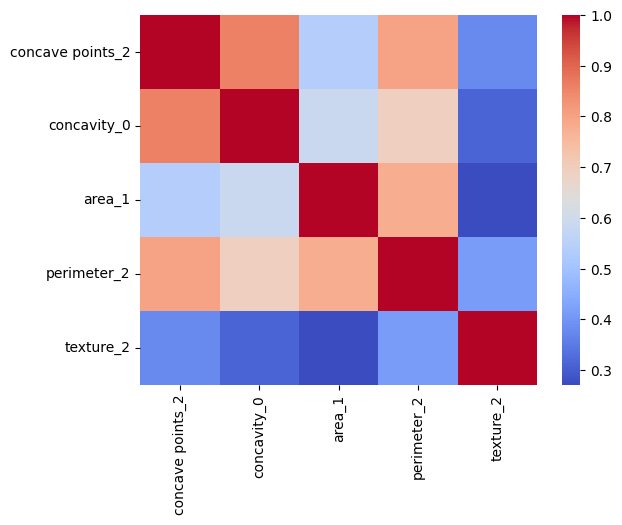

Variance explained by each component:
Component 1: 66.78%
Component 2: 16.13%


In [ ]:
##Attempt at reducing the number of features further

corr_matrix_remaining = X_train_final.corr()
sns.heatmap(corr_matrix_remaining, cmap='coolwarm') #Still fairly high correlation between concavity 0,concavity 2 and compactness 2
plt.show()

## Can see the correlation between CP2 and C0 is fairly high

# Initialize a PCA object with the desired number of components
n_components = 2 #Desired number of features
pca = PCA(n_components=n_components)

# Fit the PCA object to the standardized data
pca.fit(X_train_scaled)

# Get the principal components and their variance explained
explained_variance = pca.explained_variance_ratio_

# Print the variance explained by each component
print("Variance explained by each component:")
for i in range(n_components):
    print("Component {}: {:.2f}%".format(i+1, 100*explained_variance[i]))

In [ ]:
#Check loading of the features in each component
n_components = 2 # change this to the desired number of components
n_features = 5 # of top features to print

# Loop over the first n principal components
for i in range(n_components):
    # Get the feature loadings for the current component
    loadings = pd.DataFrame({'Feature': X_train_final.columns, 'Loading': pca.components_[i]}).sort_values('Loading', ascending=False)
    
    # Sort the loadings in descending order and print the top z features
    print("\nTop {} features for Component {}:".format(n_features, i+1))
    for j in range(n_features):
        print("{}: {:.3f}".format(loadings.iloc[j]['Feature'], loadings.iloc[j]['Loading']))
    #print('\n')

#Perimeter_2 and texture_2 seems important for the "two patterns", and has very low correlation with each other.


Top 5 features for Component 1:
perimeter_2: 0.506
concave points_2: 0.495
concavity_0: 0.479
area_1: 0.435
texture_2: 0.284

Top 5 features for Component 2:
texture_2: 0.949
perimeter_2: -0.073
concave points_2: -0.087
concavity_0: -0.187
area_1: -0.229


In [ ]:
X_train_reduced = X_train_final[['perimeter_2','texture_2']]
X_test_reduced = X_test_final[['perimeter_2','texture_2']]

optimize_logistic_regression(X_train_reduced, Y_train, X_test_reduced, Y_test, scale=False)
optimize_logistic_regression(X_train_reduced, Y_train, X_test_reduced, Y_test,)

#Only lost about 0.6% in accuracy, yet the model is much more interpretable with only two features

Best hyperparameters found for scaling: False, is:  {'C': 10, 'max_iter': 500, 'tol': 0.001}
Test set accuracy: 0.9473684210526315
Best hyperparameters found for scaling: True, is:  {'C': 100, 'max_iter': 500, 'tol': 1e-05}
Test set accuracy: 0.9473684210526315


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


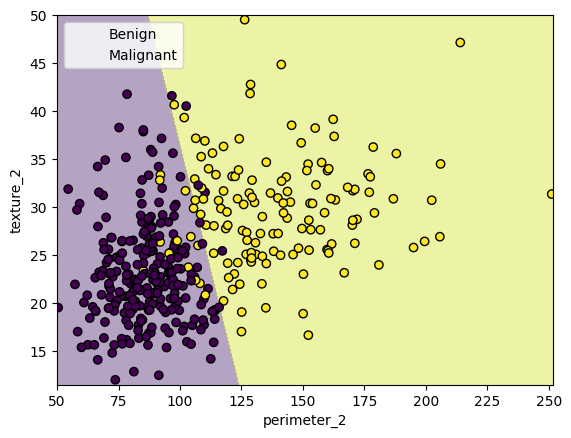

In [29]:
logreg = LogisticRegression(penalty='l2',solver = 'liblinear', C = 10,max_iter= 500, tol= 0.001)
logreg.fit(X_train_reduced, Y_train)

# define the ranges of the feature space
x_min, x_max = X_train_reduced.iloc[:, 0].min() - 0.5, X_train_reduced.iloc[:, 0].max() + 0.5
y_min, y_max = X_train_reduced.iloc[:, 1].min() - 0.5, X_train_reduced.iloc[:, 1].max() + 0.5

# create a meshgrid of points across the feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# make predictions for each point on the meshgrid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# create a contour plot of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# plot the training data points
plt.scatter(X_train_reduced.iloc[:, 0], X_train_reduced.iloc[:, 1], c=Y_train, edgecolors='k')

# set the x and y axis limits and labels
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('perimeter_2')
plt.ylabel('texture_2')

# add a legend for the data points
plt.gend(['Benign', 'Malignant'])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


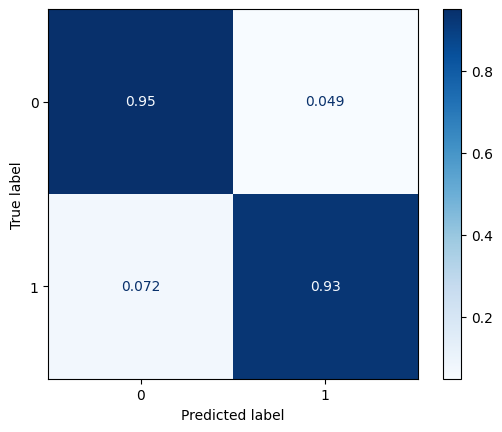

In [ ]:

plot_confusion_matrix(logreg, X_test_reduced, Y_test, cmap=plt.cm.Blues,normalize = 'true')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3c86cef2-4437-40b3-85f1-a95beaad9a14' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>